# Dark Sky dataset analysis

The dataset contains 6 months of weather data collected in another script (`FetchWeatherData.ipynb`).

Dark Sky provides two types of API requests to retrieve the weather anywhere in the world:
- **The Forecast Request** returns the current weather forecast for the next week.
- **The Time Machine Request** returns the observed or forecast weather conditions for a date in the past or future.

Both forecast and time machine requests return the same weather conditions, in the same convenient JSON format.

The Dark Sky API offers a full collection of meteorological conditions in 39 different languages, including:
- Apparent (feels-like) temperature
- Atmospheric pressure
- Cloud cover
- Dew point
- Humidity
- Liquid precipitation rate
- Moon phase
- Nearest storm distance
- Nearest storm direction
- Ozone
- Precipitation type
- Snowfall
- Sun rise/set
- Temperature
- Text summaries
- UV index
- Wind gust
- Wind speed
- Wind direction

In [1]:
# import ConfigImports Notebook to import and configure libs
%run ../ConfigImports.ipynb

In [2]:
weather = pd.read_csv('../Datasets/dark_sky_data_2019-09-09_2020-03-02.csv')
weather.head(2)

,ts,dt,cur__summary,cur__precipIntensity,cur__precipProbability,cur__precipType,cur__temperature,cur__apparentTemperature,cur__humidity,cur__windSpeed,cur__windGust,cur__windBearing,cur__cloudCover,cur__uvIndex,cur__visibility,daily__summary,daily__sunriseTime,daily__sunsetTime,daily__temperatureHigh,daily__temperatureLow
0,1567985400,2019-09-09 00:30:00,Possible Light Rain,0.7929,0.47,rain,14.06,14.08,0.96,21.30,35.13,241,0.99,0,10.796,Possible drizzle in the morning.,1568008740,1568055900,16.6,7.01
1,1567989000,2019-09-09 01:30:00,Possible Light Rain,0.8310,0.45,rain,13.99,13.99,0.93,22.49,35.87,215,0.96,0,10.945,Possible drizzle in the morning.,1568008740,1568055900,16.6,7.01


There are 2 interesting human-defined approaches to look at the weather data: a daily summary description of the weather and description of point-in-time weather:
- daily__summary
- cur__summary

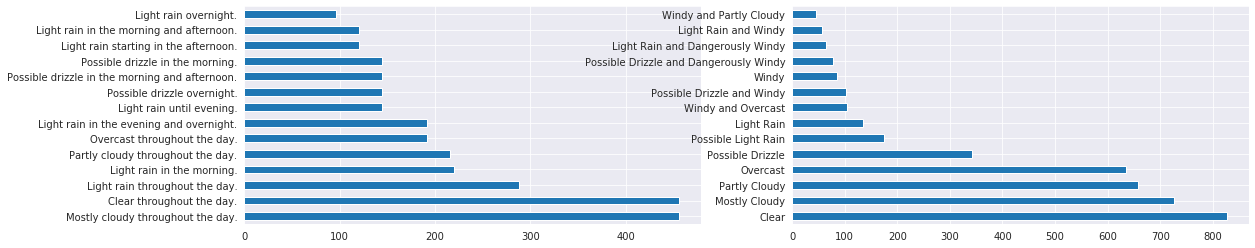

In [3]:
f, axes = plt.subplots(1,2)
f.set_figheight(4)
f.set_figwidth(18)
weather['daily__summary'].value_counts()[:14].plot(kind='barh', ax=axes[0])
weather['cur__summary'].value_counts()[:14].plot(kind='barh', ax=axes[1]);

### Visualise precipitation patterns

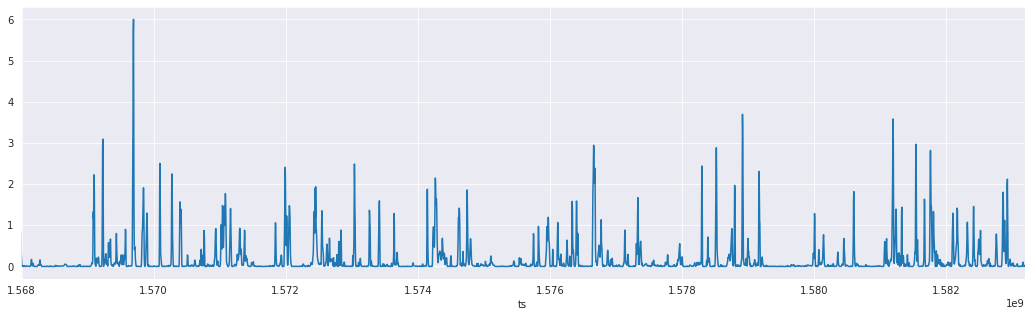

In [4]:
weather.set_index('ts')['cur__precipIntensity'].plot(figsize=(18, 5));

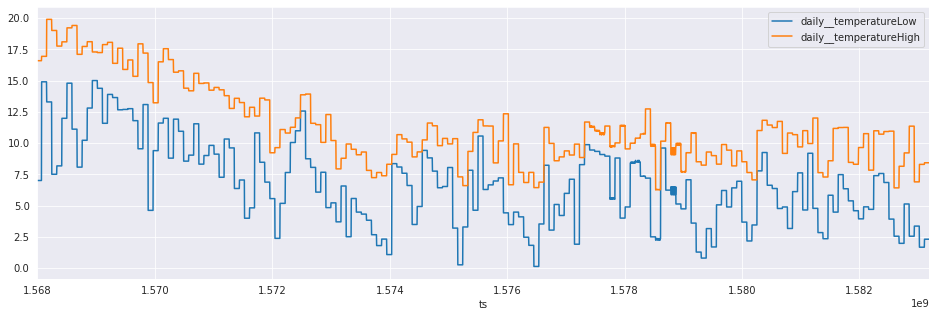

In [5]:
weather.set_index('ts')[['daily__temperatureLow', 'daily__temperatureHigh']].plot(figsize=(16,5));

### Difference between measured and "Feels-like" temperatures

As we read in [acurite](https://www.acurite.com/), feels-like temperature is a measurement of how hot or cold it really feels like outside. The “Feels Like” temperature relies on environmental data including the ambient air temperature, relative humidity, and wind speed to determine how weather conditions feel to bare skin.

"Feels-like" might be a more practical metric to utilise in the modeling stage.

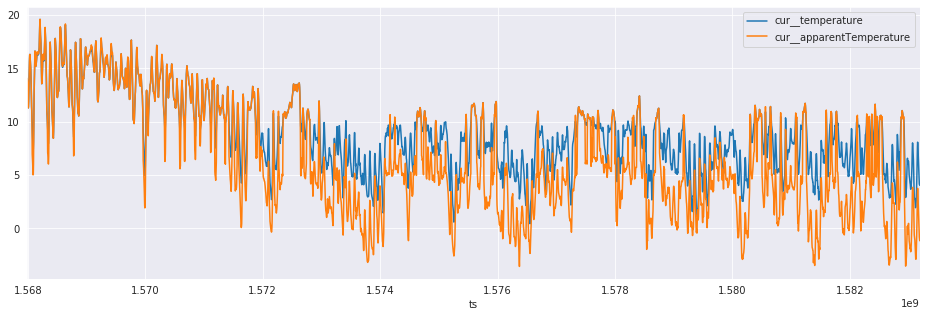

In [6]:
weather.set_index('ts')[['cur__temperature', 'cur__apparentTemperature']].plot(figsize=(16,5));

As we observe, "Feels-like" temperature tends to be lower than the measured one in the colder months of the year.

### We can also look at the wind speed

It might be interesting to see if we can connect anything with the very windy days (for example less people outside when it's so windy).

This could be connected with the rain then, as during a very windy **and a rainy day** we should expect even less people outside.

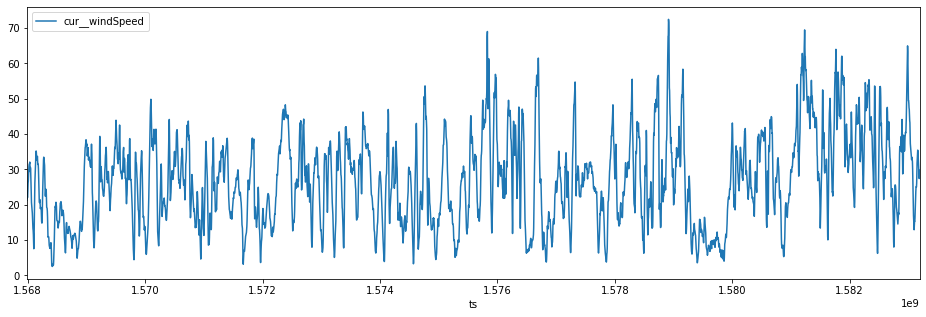

In [49]:
weather.set_index('ts')[['cur__windSpeed']].plot(figsize=(16,5));